#### 参考项目 

[PythonDataScienceHandbook](https://github.com/jakevdp/PythonDataScienceHandbook)

#### 参考文档

1. [numpy](http://www.numpy.org/)
   
   [numpy-doc](https://docs.scipy.org/doc/)

2. [pandas]()

3. [matplot]()

本文档是简要的记录

### 0 preface

1. 

![](https://static1.squarespace.com/static/5150aec6e4b0e340ec52710a/t/51525c33e4b0b3e0d10f77ab/1364352052403/Data_Science_VD.png?format=750w)

2. 环境准备

        conda install numpy pandas scikit-learn matplotlib seaborn jupyter

# 1 basic


In [4]:
#时间测试
%timeit sum(range(100))

1.19 µs ± 26.8 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [5]:
%%timeit
total = 0
for i in range(1000):
    for j in range(1000):
        total += i * (-1) ** j

439 ms ± 3.83 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [6]:
import random
L = [random.random() for i in range(100000)]
%timeit L.sort()

469 µs ± 12.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


# 2 numpy

python对象，不仅仅是一个对象

```C
struct _longobject {
    long ob_refcnt;
    PyTypeObject *ob_type;
    size_t ob_size;
    long ob_digit[1];
};
```

numpy在底层进行了抽象

In [7]:
import numpy as np
np.__version__

'1.16.2'

In [8]:
#直接创建
# integer array:
print(np.array([1, 4, 2, 5, 3]))
print(np.zeros((3,4),dtype=int))
print(np.diag([1,2,3,4]))
np.linspace(0, 1, 5) #这个很常用

[1 4 2 5 3]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[1 0 0 0]
 [0 2 0 0]
 [0 0 3 0]
 [0 0 0 4]]


array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [9]:
np.random.normal(0, 1, (3, 3))#正态分布

array([[ 1.15863899, -0.09156408, -0.4117675 ],
       [-0.84793162, -1.33400375, -2.25453567],
       [ 1.72031322,  0.52615521, -0.23673947]])

| Data type	    | Description |
|---------------|-------------|
| ``bool_``     | Boolean (True or False) stored as a byte |
| ``int_``      | Default integer type (same as C ``long``; normally either ``int64`` or ``int32``)| 
| ``intc``      | Identical to C ``int`` (normally ``int32`` or ``int64``)| 
| ``intp``      | Integer used for indexing (same as C ``ssize_t``; normally either ``int32`` or ``int64``)| 
| ``int8``      | Byte (-128 to 127)| 
| ``int16``     | Integer (-32768 to 32767)|
| ``int32``     | Integer (-2147483648 to 2147483647)|
| ``int64``     | Integer (-9223372036854775808 to 9223372036854775807)| 
| ``uint8``     | Unsigned integer (0 to 255)| 
| ``uint16``    | Unsigned integer (0 to 65535)| 
| ``uint32``    | Unsigned integer (0 to 4294967295)| 
| ``uint64``    | Unsigned integer (0 to 18446744073709551615)| 
| ``float_``    | Shorthand for ``float64``.| 
| ``float16``   | Half precision float: sign bit, 5 bits exponent, 10 bits mantissa| 
| ``float32``   | Single precision float: sign bit, 8 bits exponent, 23 bits mantissa| 
| ``float64``   | Double precision float: sign bit, 11 bits exponent, 52 bits mantissa| 
| ``complex_``  | Shorthand for ``complex128``.| 
| ``complex64`` | Complex number, represented by two 32-bit floats| 
| ``complex128``| Complex number, represented by two 64-bit floats| 

## array 属性

In [10]:
np.random.seed(0)  # seed for reproducibility

x1 = np.random.randint(10, size=6)  # One-dimensional array
x2 = np.random.randint(10, size=(3, 4))  # Two-dimensional array
x3 = np.random.randint(10, size=(3, 4, 5))  # Three-dimensional array

In [11]:
print(x2)
print(x2[:2]) #切片，类似range
x2[2, 0]


[[3 5 2 4]
 [7 6 8 8]
 [1 6 7 7]]
[[3 5 2 4]
 [7 6 8 8]]


1

In [12]:
grid = np.arange(1, 10).reshape((3, 3))
print(grid)
## 分割
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3 = np.split(x, [3, 5])
print(x1, x2, x3)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[1 2 3] [99 99] [3 2 1]


## 2.3 数组运算

In [13]:
x = np.arange(4)
print("x     =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2)  # floor division

x     = [0 1 2 3]
x + 5 = [5 6 7 8]
x - 5 = [-5 -4 -3 -2]
x * 2 = [0 2 4 6]
x / 2 = [0.  0.5 1.  1.5]
x // 2 = [0 0 1 1]


这几个是四则运算

The following table lists the arithmetic operators implemented in NumPy:

| Operator	    | Equivalent ufunc    | Description                           |
|---------------|---------------------|---------------------------------------|
|``+``          |``np.add``           |Addition (e.g., ``1 + 1 = 2``)         |
|``-``          |``np.subtract``      |Subtraction (e.g., ``3 - 2 = 1``)      |
|``-``          |``np.negative``      |Unary negation (e.g., ``-2``)          |
|``*``          |``np.multiply``      |Multiplication (e.g., ``2 * 3 = 6``)   |
|``/``          |``np.divide``        |Division (e.g., ``3 / 2 = 1.5``)       |
|``//``         |``np.floor_divide``  |Floor division (e.g., ``3 // 2 = 1``)  |
|``**``         |``np.power``         |Exponentiation (e.g., ``2 ** 3 = 8``)  |
|``%``          |``np.mod``           |Modulus/remainder (e.g., ``9 % 4 = 1``)|

Additionally there are Boolean/bitwise operators; we will explore these in [Comparisons, Masks, and Boolean Logic](02.06-Boolean-Arrays-and-Masks.ipynb).

In [14]:
theta = np.linspace(0, np.pi, 3)
print(np.sin(theta)) ##常用来作图

[0.0000000e+00 1.0000000e+00 1.2246468e-16]


In [15]:
from scipy import special
# Gamma functions (generalized factorials) and related functions
x = [1, 5, 10]
print("gamma(x)     =", special.gamma(x))
print("ln|gamma(x)| =", special.gammaln(x))
print("beta(x, 2)   =", special.beta(x, 2))

gamma(x)     = [1.0000e+00 2.4000e+01 3.6288e+05]
ln|gamma(x)| = [ 0.          3.17805383 12.80182748]
beta(x, 2)   = [0.5        0.03333333 0.00909091]


In [16]:
#聚合
x = np.arange(1, 6)
np.add.reduce(x)

15

In [17]:
#外积
x = np.arange(1, 6)
np.multiply.outer(x, x)

array([[ 1,  2,  3,  4,  5],
       [ 2,  4,  6,  8, 10],
       [ 3,  6,  9, 12, 15],
       [ 4,  8, 12, 16, 20],
       [ 5, 10, 15, 20, 25]])

## 聚合相关

### Other aggregation functions

NumPy provides many other aggregation functions, but we won't discuss them in detail here.
Additionally, most aggregates have a ``NaN``-safe counterpart that computes the result while ignoring missing values, which are marked by the special IEEE floating-point ``NaN`` value (for a fuller discussion of missing data, see [Handling Missing Data](03.04-Missing-Values.ipynb)).
Some of these ``NaN``-safe functions were not added until NumPy 1.8, so they will not be available in older NumPy versions.

The following table provides a list of useful aggregation functions available in NumPy:

|Function Name      |   NaN-safe Version  | Description                                   |
|-------------------|---------------------|-----------------------------------------------|
| ``np.sum``        | ``np.nansum``       | Compute sum of elements                       |
| ``np.prod``       | ``np.nanprod``      | Compute product of elements                   |
| ``np.mean``       | ``np.nanmean``      | Compute mean of elements     平均             |
| ``np.std``        | ``np.nanstd``       | Compute standard deviation 标准差             |
| ``np.var``        | ``np.nanvar``       | Compute variance 方差                         |
| ``np.min``        | ``np.nanmin``       | Find minimum value                            |
| ``np.max``        | ``np.nanmax``       | Find maximum value                            |
| ``np.argmin``     | ``np.nanargmin``    | Find index of minimum value                   |
| ``np.argmax``     | ``np.nanargmax``    | Find index of maximum value                   |
| ``np.median``     | ``np.nanmedian``    | Compute median of elements                    |
| ``np.percentile`` | ``np.nanpercentile``| Compute rank-based statistics of elements     |
| ``np.any``        | N/A                 | Evaluate whether any elements are true        |
| ``np.all``        | N/A                 | Evaluate whether all elements are true        |

We will see these aggregates often throughout the rest of the book.


## 广播机制

Broadcasting in NumPy follows a strict set of rules to determine the interaction between the two arrays:

- Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is *padded* with ones on its leading (left) side. 左侧扩展维度
- Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape. 1维度扩展
- Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised. 



(50,) (50, 1) (50, 50)


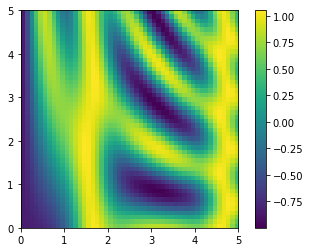

In [18]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)
print(x.shape,y.shape,z.shape)

%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(z, origin='lower', extent=[0, 5, 0, 5], cmap='viridis')
plt.colorbar();

## 掩码与选择

In [19]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


In [20]:
x[ (x > 5) | (x<4 )]

array([0, 3, 3, 7, 9, 3, 2, 7, 6])

## Fancy Indexing



In [21]:
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


In [22]:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[71, 86],
       [60, 20]])

In [23]:
x.reshape((2,5))[1, [2, 0, 1]]

array([86, 20, 82])

In [24]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

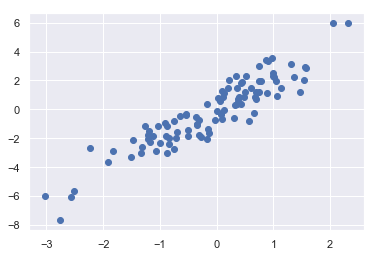

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
plt.scatter(X[:,0],X[:,1])

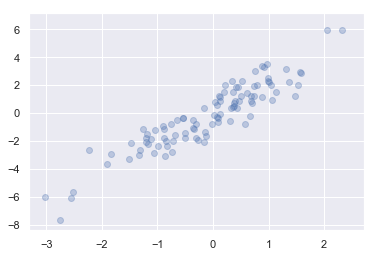

In [26]:
indices = np.random.choice(X.shape[0], 20, replace=False) # 随机选择
selection = X[indices]  # fancy indexing here
selection.shape
#显示选定的点
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='none', s=200);

In [27]:
#不改变数组的排序
x = np.array([2, 1, 4, 3, 5])
i = np.argsort(x)
print(i)

[1 0 3 2 4]


## k近邻

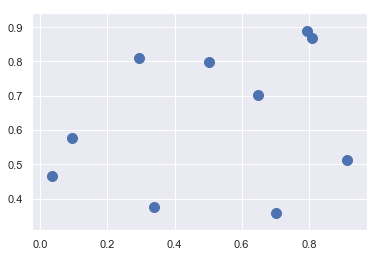

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set() # Plot styling
X = rand.rand(10, 2)
plt.scatter(X[:, 0], X[:, 1], s=100);

In [29]:
#计算点点距离
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :]) ** 2, axis=-1)

In [30]:
X[:, np.newaxis, :].shape

(10, 1, 2)

In [31]:
dist_sq.diagonal()

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [32]:
##找最大的
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 3 5 7 4 2 6 1 8 9]
 [1 4 8 5 9 7 6 2 0 3]
 [2 6 5 4 3 0 1 7 8 9]
 [3 0 5 2 6 4 7 1 8 9]
 [4 5 1 6 2 7 8 0 3 9]
 [5 4 2 6 3 0 1 7 8 9]
 [6 2 5 4 3 1 0 7 8 9]
 [7 9 8 0 1 5 4 3 2 6]
 [8 9 1 7 4 5 0 6 2 3]
 [9 8 7 1 4 5 0 6 2 3]]


In [33]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)
print(nearest_partition)

[[0 3 5 7 4 1 6 2 8 9]
 [1 4 8 5 9 3 6 7 2 0]
 [2 6 5 4 3 0 1 7 8 9]
 [3 5 0 2 6 4 1 7 8 9]
 [4 5 1 6 2 7 8 0 3 9]
 [4 5 2 6 3 0 1 7 8 9]
 [6 2 5 4 1 3 0 7 8 9]
 [7 9 8 0 1 5 6 3 2 4]
 [8 9 1 7 4 5 6 3 2 0]
 [8 9 7 1 4 5 6 3 2 0]]


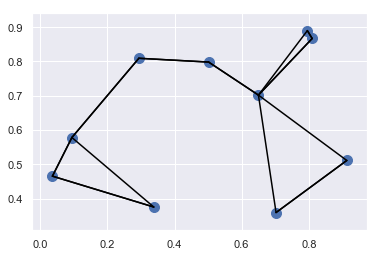

In [34]:
plt.scatter(X[:, 0], X[:, 1], s=100)
# draw lines from each point to its two nearest neighbors
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')

In [35]:
#富类型
# Use a compound data type for structured arrays
data = np.zeros(4, dtype={'names':('name', 'age', 'weight'),
                          'formats':('U10', 'i4', 'f8')})
print(data.dtype)

[('name', '<U10'), ('age', '<i4'), ('weight', '<f8')]


# pandas

In [36]:
import pandas as pd
pd.__version__

'0.23.4'

In [37]:
#生成系列，自动带idx
data = pd.Series([0.25, 0.5, 0.75, 1.0])
print(data[0])
data

0.25


0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64

In [38]:
#组装dataframe
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)

states = pd.DataFrame({'population': population,
                       'area': area})
states

,population,area
California,38332521,423967
Texas,26448193,695662
New York,19651127,141297
Florida,19552860,170312
Illinois,12882135,149995


In [39]:
print(states.index, states.columns)

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object') Index(['population', 'area'], dtype='object')


In [40]:
states['density'] = states['population'] / states['area']
states

,population,area,density
California,38332521,423967,90.413926
Texas,26448193,695662,38.018740
New York,19651127,141297,139.076746
Florida,19552860,170312,114.806121
Illinois,12882135,149995,85.883763


## 3.3 pandas操作

In [41]:
df = pd.DataFrame(rng.randint(0, 10, (3, 4)),
                  columns=['A', 'B', 'C', 'D'])
df
##随机生成

,A,B,C,D
0,8,8,1,6
1,7,7,8,1
2,5,9,8,9


In [42]:
#自动扩展计算
np.sin(df * np.pi / 4)

,A,B,C,D
0,-2.449294e-16,-2.449294e-16,7.071068e-01,-1.000000
1,-7.071068e-01,-7.071068e-01,-2.449294e-16,0.707107
2,-7.071068e-01,7.071068e-01,-2.449294e-16,0.707107


## 缺省值

在数据表或 DataFrame 中有很多识别缺失值的方法。一般情况下可以分为两种：一种方法是通过一个覆盖全局的掩码表示缺失值，另一种方法是用一个标签值（sentinel value）表示缺失值

Pandas 最终选择用标签方法表示缺失值，包括两种 Python 原有的缺失值：浮点数据类型的 NaN 值，以及 Python 的 None 对象。后面我们将会发现，虽
然这么做也会有一些副作用，但是在实际运用中的效果还是不错的。


In [45]:
import pandas as pd
data = pd.Series([1, np.nan, 'hello', None])
print(data[data.isnull()])


1     NaN
3    None
dtype: object


In [46]:
data.fillna(method='ffill')

0        1
1        1
2    hello
3    hello
dtype: object

In [47]:
data.fillna(method='bfill')

0        1
1    hello
2    hello
3     None
dtype: object